<a href="https://colab.research.google.com/github/master-david445/Titanic-Dataset---Week-1-project-at-ENG-/blob/main/Week1_Titanic_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aurl = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
# See first few rows
df.head()

# Info about columns and data types
df.info()

# Summary of numeric columns
df.describe()

# Check for missing values
df.isnull().sum()

# See column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.nunique()


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
# Count of people who survived vs not
df['Survived'].value_counts()

# Average age of passengers
df['Age'].mean()


np.float64(29.69911764705882)

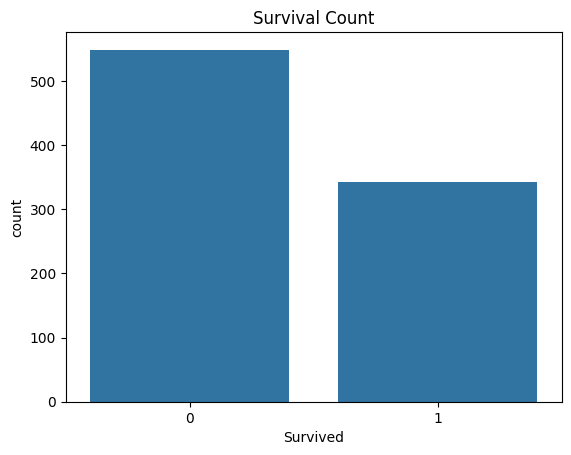

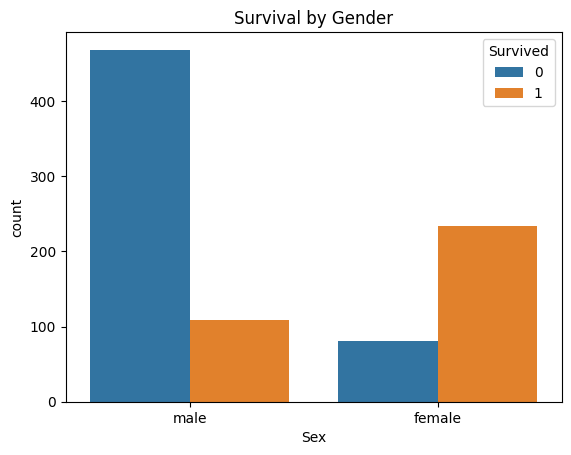

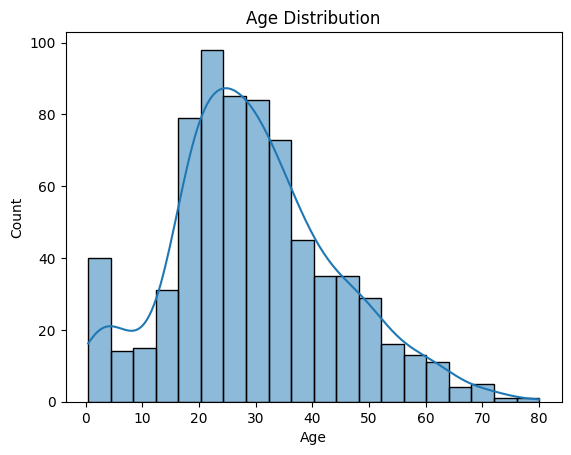

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


In [ ]:
# Fill missing ages with mean (optional)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing embarked values with most common one
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-3386104528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3386104528.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Data Visualization

This cell generates several plots to visualize key aspects of the Titanic dataset:

- A count plot shows the number of passengers who survived versus those who did not.
- A count plot shows the number of male and female passengers who survived.
- A histogram visualizes the distribution of passenger ages.

These visualizations help in understanding the basic characteristics of the data and identifying potential relationships between variables and survival.

### Handling Missing Values

This cell addresses missing values in the 'Age' and 'Embarked' columns:

- Missing age values are filled with the mean age of all passengers.
- Missing 'Embarked' values are filled with the mode (most frequent value) of the 'Embarked' column.

Handling missing data is a crucial step in data preprocessing to ensure that subsequent analysis and modeling are accurate and reliable.

In [ ]:
import numpy as np

ages = df['Age'].dropna().values  # Convert to NumPy array
print("Mean age:", np.mean(ages))
print("Standard deviation:", np.std(ages))


Mean age: 29.69911764705882
Standard deviation: 12.99471687278903


### Summary Statistics

As requsted by project requirements, this section provides a summary of the dataset, including descriptive statistics for numerical columns, information about missing values, and the data types of each column.

In [ ]:
print("=== Dataset Summary ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Column Data Types ===")
print(df.dtypes)

=== Dataset Summary ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

=== Missing Values ===
PassengerId      0
Survived      

### Data Visualization

This cell generates several plots to visualize key aspects of the Titanic dataset:

- A count plot shows the number of passengers who survived versus those who did not.
- A count plot shows the number of male and female passengers who survived.
- A histogram visualizes the distribution of passenger ages.

These visualizations help in understanding the basic characteristics of the data and identifying potential relationships between variables and survival.

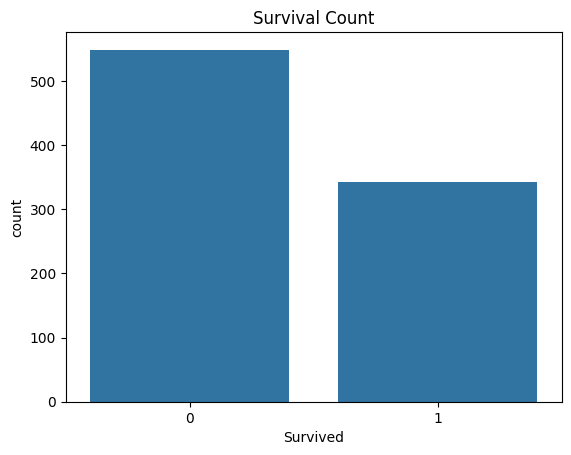

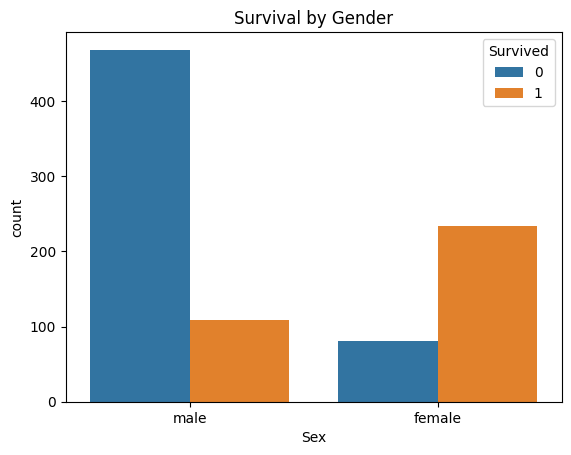

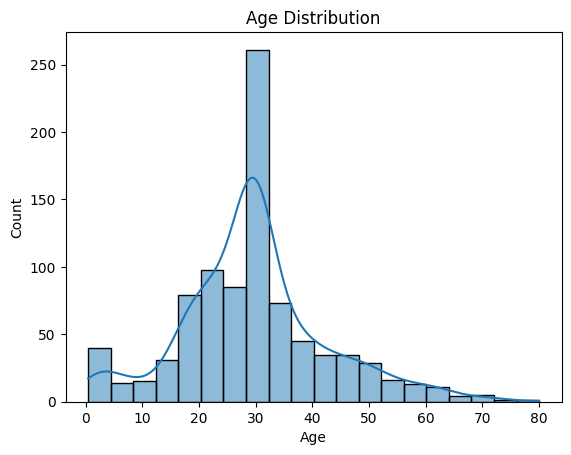

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Age distribution
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

### Handling Missing Values

This cell addresses missing values in the 'Age' and 'Embarked' columns:

- Missing age values are filled with the mean age of all passengers.
- Missing 'Embarked' values are filled with the mode (most frequent value) of the 'Embarked' column.

Handling missing data is a crucial step in data preprocessing to ensure that subsequent analysis and modeling are accurate and reliable.

In [ ]:
# Fill missing ages with mean (optional)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing embarked values with most common one
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1330883459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
import numpy as np

ages = df['Age'].dropna().values  # Convert to NumPy array
print("Mean age:", np.mean(ages))
print("Standard deviation:", np.std(ages))

Mean age: 29.69911764705882
Standard deviation: 12.99471687278903


### Age Distribution Analysis

Here, I used Numpy to calculate and print the mean and standard deviation of the ages of the passengers in the dataset.

In [ ]:
import numpy as np

ages = df['Age'].dropna().values  # Convert to NumPy array
print("Mean age:", np.mean(ages))
print("Standard deviation:", np.std(ages))